

## 2. 训练一个神经网络

上一节主要讲了简单的神经网络的结构，里面的参数$W$我们假定是已经训练好的。这一节我们要详细展开讨论一个神经网络是怎么训练的。

如上一节所描述的，一个神经网络可以把一个任意维度的向量转变成另外一个任意维度的向量。一个能满足我们需要的神经网络需要把一个向量转变成另外一个“正确”的向量，而不是包含某些随意数值的向量。什么是“正确”呢？“正确”与否以我们给神经网络提供的“答案”为准。

比如我们有一个向量$X_1$，它需要被转换成$Y_1$，那$Y_1$就是$X_1$的正确答案。

然后我们有一堆的$X$，对应一堆的$Y$，就形成了一组训练样本。神经网络训练的目标就是准确地根据输入$X$预测应该输出的$Y$.

刚开始训练的时候神经网络的$W$是随机初始化的，不能准确地根据输入$X$预测输出$Y$。但是它还是可以预测一个$\hat{Y}$，然后我们就可以根据$Y$和$\hat{Y}$的差距去调整$W$，直到$W$可以准确地根据$X$预测$Y$为止.

当然，这里面 “根据差距去调整”涉及到一系列的操作，它们也是反向传导算法（BP算法）的关键。

下面我们分几个小节来讨论，分别涉及到 误差函数， 偏导数， 链式法则 等技术细节。

### 2.1 误差

如上面所说，我们需要“根据差距去调整” $W$， 那我们首先要找到方法计算“差距”，准确说就是“误差”, 对应的英文是lost，计算这个误差的函数就是误差函数，也就是lost function.

找到合适的误差函数以后，我们要做的就是让误差函数的输出尽可能小，就意味着“差距”变得最小，那就意味着我们的输出$\hat{Y}$最接近真实值$Y$

根据以上的描述，我们也可以直观地对误差函数提出几个要求，第一，误差函数的输出应该都是正数，因为比目标大也是“差距”，比目标小也是“差距”，标记“正差距”和“负差距”意义不大。 第二，误差函数的输出的最小值应该是0，就是预测值和真实值完全相同。

根据以上直观形成的要求，第一个合适的误差函数应该是$Y$和$\hat{Y}的差值的$绝对值，就是$|Y - \hat{Y}|$。

但是因为绝对值函数在零点处不可导，数学上不好处理，所以大家开始尝试其它误差函数，进一步尝试的误差函数就是平方差误差。

此前我们都没有讨论过导数这个概念，为了让大家更好地理解后续的内容，我们先简单了解一下导数的概念。然后我们再来深入讨论其它的误差函数

#### 2.1.1 导数


导数是微积分学中一个非常重要的概念。它描述了函数在某一点的变化率,即函数在该点的切线斜率。导数可以帮助我们了解函数的变化趋势,并且在优化问题中扮演着关键的角色。

对于一个函数 $f(x)$,它在点 $x$ 处的导数记作 $f'(x)$ 或 $\frac{df}{dx}$,定义为:

$$f'(x) = \lim_{\Delta x \rightarrow 0} \frac{f(x+\Delta x) - f(x)}{\Delta x}$$

这个定义描述了导数的本质:它是函数在某一点的瞬时变化率。具体来说,它是函数在该点处的切线的斜率。

让我们通过一些简单的例子来理解导数的概念:

1. **一次函数**

   考虑函数 $f(x) = 2x + 1$,它的导数为:
   $$f'(x) = \frac{d}{dx}(2x + 1) = 2$$
   
   这说明一次函数的导数是一个常数,即它在任何点处的切线斜率都是相同的。

2. **二次函数**

   考虑函数 $f(x) = x^2$,它的导数为:
   $$f'(x) = \frac{d}{dx}(x^2) = 2x$$
   
   这意味着二次函数在不同点处的切线斜率是不同的。例如,在点 $x=1$ 处,切线斜率为 $f'(1) = 2$;在点 $x=2$ 处,切线斜率为 $f'(2) = 4$。

通过上面的例子,我们可以直观地理解导数就是函数在某一点处的切线斜率。导数不仅能描述函数的变化趋势,而且在优化问题中扮演着关键的角色。在后面的内容中,我们将看到如何利用导数来优化神经网络的参数。

非常好的补充说明。确实,绝对值函数在0处不可导,这给将其作为误差函数时的数学处理带来了麻烦。

绝对值函数 $f(x) = |x|$ 在 $x=0$ 处不可导的原因是,在该点左右两侧,函数的斜率是不同的。具体来说:

- 当 $x>0$ 时,绝对值函数的斜率为1:
  $$\lim_{\Delta x \rightarrow 0^+} \frac{|x+\Delta x| - |x|}{\Delta x} = 1$$
  
- 当 $x<0$ 时,绝对值函数的斜率为-1:
  $$\lim_{\Delta x \rightarrow 0^-} \frac{|x+\Delta x| - |x|}{\Delta x} = -1$$

因此,在 $x=0$ 处,左右两侧的极限不相等,根据导数的定义,绝对值函数在该点处是不可导的。

这给将绝对值函数作为误差函数时的数学处理带来了麻烦,因为在优化过程中,我们需要计算误差函数关于网络参数的导数(梯度),而绝对值函数在0处的不可导性会使梯度计算变得复杂或不可能。

因此,虽然绝对值函数直观上看似是一个合适的误差函数选择,但由于其不可导性,实际应用中人们通常会选择其他可导的函数作为误差函数,例如平方误差函数等。这些函数在所有点处都可导,从而可以简化梯度的计算,使得优化过程更加高效。



#### 2.1.2 **平方差误差 (Squared Error, MSE)**

平方差误差就是对$y$和$\hat{y}$的差值求平方，这样就满足了之前提出的两个要求，一个是要求输出是正数，第二是要求最小值是0. 

平方差误差可以表示为:

\begin{align}
\text{SE} = (y - \hat{y})^2
\end{align}

$y$ 是样本的真实值, $\hat{y}$ 是样本的预测值。


#### 2.1.3 **均方误差 (Mean Squared Error, MSE)**

因为我们经常一个批次的样本，所以我们希望对一个批次的预测误差进行统一的计算，于是就有了均方差。

均方差的思路很简单，就是每个样本单独求平方差，然后求一个批次内所有样本平方差的均值，就是加起来除于n,n是一个批次的样本数量

均方误差可以表示为:

\begin{align}
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
\end{align}

其中 $n$ 是样本数量, $y_i$ 是第 $i$ 个样本的真实值, $\hat{y}_i$ 是第 $i$ 个样本的预测值。

举个例子,假设我们有一个回归问题,需要预测一个连续的数值。我们训练了一个神经网络模型,对于一个包含 5 个样本的数据集,真实值分别为 [3, 5, 2, 7, 4],而模型预测的值分别为 [2.8, 4.9, 2.2, 6.8, 4.1]。那么,这个模型在该数据集上的均方误差为:

\begin{align}
\text{MSE} = \frac{1}{5}[(3 - 2.8)^2 + (5 - 4.9)^2 + (2 - 2.2)^2 + (7 - 6.8)^2 + (4 - 4.1)^2] = 0.14
\end{align}

我们希望最小化这个均方误差,使模型的预测值尽可能接近真实值。

#### 2.1.4 **交叉熵损失 (Cross-Entropy Loss)**

很多神经网络的输出最后都是一个概率分布，比如检测数字的神经网络的输出就是一个10维的向量，每个维度的值代表了对应数字的概率。

比如，输出了一个这样的向量

\begin{align}
\hat{y}^T = \begin{bmatrix} 0.05, 0.1, 0.2, 0.05, 0.15, 0.05, 0.1, 0.05, 0.2, 0.05 \end{bmatrix}

\end{align}

在这个向量中,每个元素代表了对应数字的概率。例如,第一个元素0.05代表了数字0的概率为5%,第三个元素0.2代表了数字2的概率为20%,以此类推。这个向量的所有元素之和为1,符合概率分布的要求。

然后我们会拿这个输出和标记的“真实”值进行比较，以计算误差，比如对应的标记是这个数字其实是 2， 那标记的概率分布是这样的：

\begin{align}
y^T = \begin{bmatrix} 0, 0, 1, 0, 0, 0, 0, 0, 0, 0 \end{bmatrix}

\end{align}

这个时候使用均方差MSE就会有问题，因为除了2那个位置的1以外，其它概率都是0.也就是说我们的标记说这个数字是2，不是其它数字，但是我们的标记数据并不会说明这个字有多像其它数字。 标记数据其实并不是“真实”的概率分布，标记数据只是表明当前的样本的结果是什么。

从计算结果上来看，就会导致预测的分布最终会向0概率趋近，神经网络在训练过程中会发现把所有值都预测成一个接近0的概率会得到最小的误差。

为了解决这个问题，人们采用了交叉熵损失函数。

交叉熵损失常用于分类问题,它度量了预测概率分布与真实概率分布之间的差异。对于一个样本,交叉熵损失可以表示为:

\begin{align}
\text{CE} = -\sum_{i=1}^{C}y_i\log(\hat{y}_i)
\end{align}

其中 $C$ 是类别数量, $y_i$ 是第 $i$ 类的真实标签 (0 或 1), $\hat{y}_i$ 是第 $i$ 类的预测概率。

假设我们有一个二分类问题,需要判断一个图像是猫还是狗。我们训练了一个神经网络模型,对于一个真实标签为"狗"的图像,模型预测的概率分布为 [0.2, 0.8],其中 0.2 对应"猫"的概率,0.8 对应"狗"的概率。那么,这个样本的交叉熵损失为:

\begin{align}
\text{CE} = -(0 \log(0.2) + 1 \log(0.8)) = 0.223
\end{align}

我们希望最小化这个交叉熵损失,使模型的预测概率分布尽可能接近真实分布。

通过最小化这些目标函数,我们可以使神经网络的输出逐渐接近期望值。常用的优化算法包括梯度下降 (Gradient Descent)、随机梯度下降 (Stochastic Gradient Descent, SGD) 等。



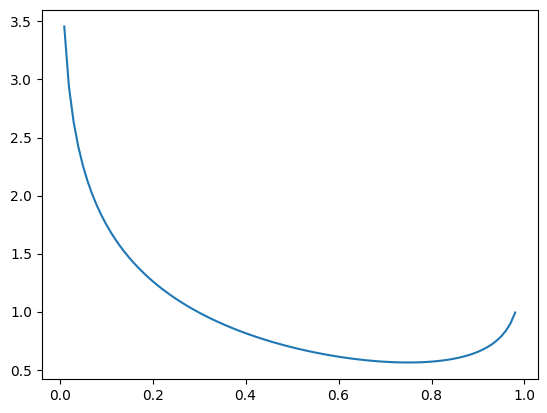

In [11]:
# 以下是一个二分类问题的熵函数，其中p是正类的概率，1-p是负类的概率，H是熵值。
# 真实概率分布是p=0.75，1-p=0.25。
# 图中展示了当p在0.01到0.99之间变化时，熵值的变化情况。
# 可以看到，当p=0.75时，熵值最小，交叉熵损失也最小。

import numpy as np
import matplotlib.pyplot as plt

p = np.arange(0.01, 0.99, 0.01)
entropy = -np.log(p)*0.75 - np.log(1-p)*0.25

plt.plot(p, entropy)

### 2.2 反向传播

反向传播 (Backpropagation) 是训练多层神经网络的核心算法,它通过链式法则计算每个权重对误差的贡献,从而确定梯度方向,指导权重的调整。

具体来说,反向传播算法包括以下步骤:

1. **前向传播**: 输入样本通过神经网络层层传递,计算每一层的输出。
2. **计算输出层误差**: 将输出层的输出与真实标签进行比较,计算输出层的误差。
3. **反向传播误差**: 根据链式法则,将输出层的误差反向传播到前一层,计算每一层的误差。
4. **计算梯度**: 对每一层的权重和偏置计算梯度,即它们对误差的偏导数。
5. **更新权重和偏置**: 根据梯度的方向,使用优化算法 (如梯度下降) 更新权重和偏置。

反向传播算法使得深层神经网络可以被有效地训练,因为它提供了一种端到端的误差传递机制,使得每一层的参数都可以根据最终的输出误差进行调整。

从直观的角度进行拆解，根据误差计算参数的调整方向有两个关键技术点要解决，一个是同一层的神经网络中各个参数之间分别应该承担多少调整量，这个问题通过偏导数来解决； 第二个是不同层之间怎么传导误差，这个技术问题通过链式法则来解决。

我们先用一个简单的神经网络来理解这两个关键技术点，然后再针对偏导数和链式法则做深入的讨论。

假设我们有一个两层的神经网络，输入只有两个特征，就是$x_1$和$x_2$， 中间层有两个神经元，为了讨论方便用$h_1$和$h_2$来表示，然后$h_1$和$h_2$连接到最后一个输出层$y$。

神经网络示意图如下：

<div style="align-items: center;">
    <img src="../images/001_network.png" alt="神经网络" style="max-height:300px;background-color:#333333;">
</div>

对应的数学表达如下：


$$h_1 = w_1x_1 + w_2x_2 + b_1$$
$$h_2 = w_3x_1 + w_4x_2 + b_2$$ 
$$y = w_5h_1 + w_6h_2 + b_3$$

其中 $w_i$ 表示权重参数, $b_i$ 表示偏置参数。

现在让我们从偏导数的角度来看,如何解决同一层参数之间的误差分担问题。以输出层为例,我们的目标是最小化均方误差损失函数:

$$J(w, b) = \frac{1}{2}(y - \hat{y})^2$$

其中 $\hat{y}$ 是神经网络的输出,而 $y$ 是真实标签。为了更新参数,我们需要计算参数对误差的偏导数。对于输出层的权重 $w_5$,我们有:

$$\frac{\partial J}{\partial w_5} = \frac{\partial J}{\partial y} \cdot \frac{\partial y}{\partial w_5} = (y - \hat{y}) \cdot h_1$$

类似地,对于 $w_6$ 和 $b_3$,我们有:

$$\frac{\partial J}{\partial w_6} = (y - \hat{y}) \cdot h_2$$
$$\frac{\partial J}{\partial b_3} = y - \hat{y}$$

通过计算这些偏导数,我们可以确定每个参数应该如何调整,以减小总体误差。注意,同一层的不同参数对误差的贡献是不同的,这就是通过偏导数来分担误差的原因。

接下来,让我们看看如何使用链式法则在不同层之间传播误差。我们从输出层开始,计算输出层误差对隐藏层输出的偏导数:

$$\frac{\partial J}{\partial h_1} = \frac{\partial J}{\partial y} \cdot \frac{\partial y}{\partial h_1} = (y - \hat{y}) \cdot w_5$$
$$\frac{\partial J}{\partial h_2} = \frac{\partial J}{\partial y} \cdot \frac{\partial y}{\partial h_2} = (y - \hat{y}) \cdot w_6$$

现在,我们可以继续向后传播误差,计算隐藏层误差对输入层的偏导数:

$$\frac{\partial J}{\partial x_1} = \frac{\partial J}{\partial h_1} \cdot \frac{\partial h_1}{\partial x_1} + \frac{\partial J}{\partial h_2} \cdot \frac{\partial h_2}{\partial x_1} = (y - \hat{y}) \cdot (w_5w_1 + w_6w_3)$$
$$\frac{\partial J}{\partial x_2} = \frac{\partial J}{\partial h_1} \cdot \frac{\partial h_1}{\partial x_2} + \frac{\partial J}{\partial h_2} \cdot \frac{\partial h_2}{\partial x_2} = (y - \hat{y}) \cdot (w_5w_2 + w_6w_4)$$

这里要注意，因为$x_1$和$x_2$已经是神经网络的输入，我们并不能改变它们，所以计算了它们的偏导数并不能指导我们如何调整第一层的参数。

为了要知道第一层的参数分别需要调整多少，我们需要计算的其实是第一层参数$w_1, w_2, w_3, w_4$的偏导数。

根据相同的方法，我们可以推导出:

$$\frac{\partial J}{\partial w_1} = \frac{\partial J}{\partial h_1} \cdot \frac{\partial h_1}{\partial w_1} = (y - \hat{y}) \cdot w_5 \cdot x_1$$
$$\frac{\partial J}{\partial w_2} = \frac{\partial J}{\partial h_1} \cdot \frac{\partial h_1}{\partial w_2} = (y - \hat{y}) \cdot w_5 \cdot x_2$$
$$\frac{\partial J}{\partial w_3} = \frac{\partial J}{\partial h_2} \cdot \frac{\partial h_2}{\partial w_3} = (y - \hat{y}) \cdot w_6 \cdot x_1$$
$$\frac{\partial J}{\partial w_4} = \frac{\partial J}{\partial h_2} \cdot \frac{\partial h_2}{\partial w_4} = (y - \hat{y}) \cdot w_6 \cdot x_2$$

通过计算这些偏导数,我们可以获得第一层权重对最终误差的贡献,并相应地更新它们。

例如,假设 $y = 1, \hat{y} = 0.6, w_5 = 0.3, w_6 = 0.5, x_1 = 0.5, x_2 = 0.1$,我们可以计算:

$$\frac{\partial J}{\partial w_1} = (1 - 0.6) \cdot 0.3 \cdot 0.5 = 0.06$$
$$\frac{\partial J}{\partial w_2} = (1 - 0.6) \cdot 0.3 \cdot 0.1 = 0.012$$
$$\frac{\partial J}{\partial w_3} = (1 - 0.6) \cdot 0.5 \cdot 0.5 = 0.1$$
$$\frac{\partial J}{\partial w_4} = (1 - 0.6) \cdot 0.5 \cdot 0.1 = 0.02$$

根据这些梯度值,我们可以相应地更新第一层的权重参数。通过计算每个参数的梯度,反向传播算法可以有效地训练整个神经网络。

通过这种方式,我们可以计算出每个参数对最终误差的贡献,并相应地更新它们。反向传播算法通过链式法则和偏导数,提供了一种高效的方法来训练深层神经网络。


通过对以上数值的观察，我们可以看到第一层的参数对应要调整的数值已经比较小了，因为里面涉及到多个小数的乘法，当神经网络的层数变多以后，这个现象就会变得更加明显，直到这个数值小到我们的机器无法表达，这个现象就是梯度消失。

另一方面，如果各个相乘的数都大于1，也有可能这个数值会变得很大很大，直到我们的机器无法表达为止，这个就是梯度爆炸。

现实情况中梯度消失比较容易出现。不过，不管是梯度消失还是梯度爆炸，都给神经网络设计带来了一个很大的问题。

下面我们稍微详细地展开讨论一下梯度消失和梯度爆炸：

### 2.3 梯度消失和梯度爆炸



#### 2.3.1 梯度消失

梯度消失是指在训练深层神经网络时,由于反向传播过程中的链式求导运算,导致梯度值越来越小,最终接近于0的现象。这种现象会导致神经网络的权重无法正常更新,从而影响模型的训练效果。

梯度消失的主要原因是在反向传播过程中,误差梯度通过激活函数的求导运算会被压缩,尤其是在使用sigmoid或tanh等饱和型激活函数时,梯度值在经过多层网络后会指数级衰减。具体来说,如果激活函数的导数值在(0,1)区间内,那么经过多层网络后,梯度将趋近于0。

梯度消失会导致以下问题:

1. **权重无法更新**:由于梯度接近于0,网络的权重无法正确地更新,模型无法继续学习。
2. **信息无法有效传递**:梯度消失阻碍了信息在网络层之间的有效传递,网络难以学习到输入和输出之间的映射关系。
3. **训练停滞**:由于权重无法更新,模型的训练过程会停滞,无法继续优化。

为了缓解梯度消失的问题,研究人员提出了多种解决方案,例如:

1. **使用ReLU激活函数**:ReLU激活函数的导数在正区间为1,避免了梯度消失的问题。但是ReLU也存在"死亡神经元"的缺陷。
2. **残差连接(Residual Connection)**:残差连接通过直接将前面层的输出与后面层的输出相加,有效地缓解了梯度消失问题。
3. **长短期记忆网络(LSTM)**:LSTM通过门控机制和记忆单元,可以更好地捕捉长期依赖关系,从而缓解梯度消失问题。
4. **初始化技术**:合理的参数初始化方式,如Xavier初始化或He初始化,可以一定程度上缓解梯度消失问题。

总的来说,梯度消失是训练深层神经网络时面临的一个重要挑战,需要通过合理的网络设计和优化技术来缓解。

#### 2.3.2 梯度爆炸

与梯度消失相反,梯度爆炸是指在反向传播过程中,梯度值会越来越大,最终超出计算机的表示范围的现象。梯度爆炸会导致模型的权重发散,无法收敛到最优解。

梯度爆炸的主要原因是在反向传播过程中,误差梯度通过激活函数的求导运算会被放大,尤其是在使用ReLU等非饱和型激活函数时,梯度值在经过多层网络后会指数级增长。

梯度爆炸会导致以下问题:

1. **权重发散**:由于梯度过大,网络的权重会不断增大,远离最优解。
2. **计算溢出**:当梯度值超出计算机的表示范围时,会导致计算溢出错误。
3. **训练失败**:由于权重发散和计算溢出,模型的训练过程会失败,无法收敛。

为了缓解梯度爆炸的问题,研究人员提出了以下解决方案:

1. **梯度裁剪(Gradient Clipping)**:将梯度值限制在一个合理的范围内,避免梯度过大。
2. **权重正则化**:通过L1或L2正则化项,限制权重的大小,防止权重过度增长。
3. **梯度归一化(Gradient Normalization)**:将梯度向量归一化到单位范数,避免梯度过大。
4. **初始化技术**:合理的参数初始化方式,如Xavier初始化或He初始化,可以一定程度上缓解梯度爆炸问题。

总的来说,梯度爆炸是训练深层神经网络时面临的另一个重要挑战,需要通过合理的网络设计和优化技术来缓解。梯度爆炸和梯度消失都会影响模型的训练效果,因此需要格外注意。